<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [3]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv(r'dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [5]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

#La nature des données dans chacune des colonnes
print(population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print(population.count())

Le tableau comporte 3 colonne(s)
Zone       object
Année       int64
Valeur    float64
dtype: object
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [6]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [7]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

population ['Valeur']*=1000

#population ['Valeur'] = population ['Valeur'] * 1000 

population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [8]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur' : 'Population'}, inplace=True)
population


,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [9]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [10]:
#Afficher les dimensions du dataset
dim_alimentaire_col = dispo_alimentaire.shape[1]
dim_alimentaire_lin = dispo_alimentaire.shape[0]
print(f"le tableau de la disponibilité alimentaire comporte : \n {dim_alimentaire_lin} lignes et {dim_alimentaire_col} colonnes")

le tableau de la disponibilité alimentaire comporte : 
 15605 lignes et 18 colonnes


In [11]:
#Consulter le nombre de colonnes
print ( dim_alimentaire_col )


18


In [12]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [13]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire_2 = dispo_alimentaire.copy()
dispo_alimentaire_2 = dispo_alimentaire_2.fillna(0)
dispo_alimentaire_2.head(5)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#afficher les noms des colonnes les unes en dessous des autres

print("\n".join(dispo_alimentaire_2.columns)) 



Zone
Produit
Origine
Aliments pour animaux
Autres Utilisations
Disponibilité alimentaire (Kcal/personne/jour)
Disponibilité alimentaire en quantité (kg/personne/an)
Disponibilité de matière grasse en quantité (g/personne/jour)
Disponibilité de protéines en quantité (g/personne/jour)
Disponibilité intérieure
Exportations - Quantité
Importations - Quantité
Nourriture
Pertes
Production
Semences
Traitement
Variation de stock


In [15]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg  



filtre_tonnes_en_kg = ['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité', 'Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']

for elt in filtre_tonnes_en_kg:
    dispo_alimentaire_2 [elt] *= 1000000

dispo_alimentaire_2.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire_2.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [17]:
aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [18]:
#Afficher les dimensions du dataset
dim_aide_alim_col = aide_alimentaire.shape[1]
dim_aide_alim_lin = aide_alimentaire.shape[0]
print(f"le tableau de la disponibilité alimentaire comporte {dim_aide_alim_lin} lignes et {dim_aide_alim_col} colonnes")
aide_alimentaire.info()

le tableau de la disponibilité alimentaire comporte 1475 lignes et 4 colonnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [19]:
#Consulter le nombre de colonnes
dim_aide_alim_col = aide_alimentaire.shape[1]

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [21]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire' : 'Zone'})

aide_alimentaire

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [22]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide_alimentaire = aide_alimentaire.rename(columns={'Valeur': 'aide_alimentaire'})
aide_alimentaire ['aide_alimentaire'] *= 1000
aide_alimentaire.head()

,Zone,Année,Produit,aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [23]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [24]:
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [25]:
#Afficher les dimensions du dataset
dim_nutrition_col = sous_nutrition.shape[1]
dim_nutrition_lin = sous_nutrition.shape[0]
print(f"le tableau de la disponibilité alimentaire comporte {dim_nutrition_lin} lignes et {dim_nutrition_col} colonnes")

le tableau de la disponibilité alimentaire comporte 1218 lignes et 3 colonnes


In [26]:
#Consulter le nombre de colonnes
dim_nutrition_col

3

In [27]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [28]:
#Conversion de la colonne sous nutrition en numérique

In [29]:
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition.fillna(0,inplace=True)
sous_nutrition
#print(sous_nutrition.isna().sum()) Verifier les NaN

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [30]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur':'sous_nutrition_1'}, inplace=True)
sous_nutrition.head()

,Zone,Année,sous_nutrition_1
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [31]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition ['sous_nutrition_1'] *= 1000000

In [32]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition_1
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [33]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
print(population.columns)
print(sous_nutrition.columns)

# on selectionne les valeurs liees a l'année 2017 :
pop_2017 = population[population['Année']==2017]
sous_nut_2017 = sous_nutrition[sous_nutrition['Année']=='2016-2018']

# on joint ensuite avec la fonction merge les deux tables sur la clonne commune :

pop_sous_nut_2017 = pd.merge( sous_nut_2017 , pop_2017, on='Zone' , how='inner')

pop_sous_nut_2017.head(100)

 

Index(['Zone', 'Année', 'Population'], dtype='object')
Index(['Zone', 'Année', 'sous_nutrition_1'], dtype='object')


,Zone,Année_x,sous_nutrition_1,Année_y,Population
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Allemagne,2016-2018,0.0,2017,82658409.0
...,...,...,...,...,...
95,Kazakhstan,2016-2018,0.0,2017,18080019.0
96,Kenya,2016-2018,11900000.0,2017,50221142.0
97,Kirghizistan,2016-2018,400000.0,2017,6189733.0
98,Kiribati,2016-2018,0.0,2017,114158.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyses</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [34]:
#Affichage du dataset

sous_nutrition.head()

,Zone,Année,sous_nutrition_1
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [35]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
Nombre_mal_nutris = pop_sous_nut_2017['sous_nutrition_1'].sum()
Pop_totale = pop_sous_nut_2017['Population'].sum()


print(f'Le nombre de personnes en sous-nutrition est de {Nombre_mal_nutris} personnes sur une population totale de {Pop_totale}, soit {round((Nombre_mal_nutris / Pop_totale) * 100, 2)} %')



Le nombre de personnes en sous-nutrition est de 535700000.0 personnes sur une population totale de 7543798779.0, soit 7.1 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [36]:
#Combien mange en moyenne un être humain ? Source =>  OMS - Apports énergétiques

Moyenne_par_humain = 2250

In [37]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

dispo_alimentaire_total = pd.merge(population, dispo_alimentaire_2, on='Zone', how='left')

dispo_alimentaire_2017 = dispo_alimentaire_total[dispo_alimentaire_total['Année']==2017].copy()

dispo_alimentaire_2017.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dispo_alimentaire_2017.columns

Index(['Zone', 'Année', 'Population', 'Produit', 'Origine',
       'Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [39]:
#Affichage du nouveau dataframe
dispo_alimentaire_2017.head()


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Création de la colonne dispo_kcal et calcul des kcal disponibles mondialement


# 1. Création de la colonne 'dispo_kcal' pour chaque ligne
dispo_alimentaire_2017['dispo_kcal'] = (
    dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)'] *
    dispo_alimentaire_2017['Population'] * 365
)

total_kcal_mondial_2017 = dispo_alimentaire_2017['dispo_kcal'].sum()
print(f"Total des calories disponibles en 2017 : {total_kcal_mondial_2017} kcal")

# Vérifier les types de données dans la colonne 'Zone' des deux DataFrames 

Zone_population = population['Zone'].dtype
Zone_dispo_alim = dispo_alimentaire_2['Zone'].dtype

print("Type de données dans 'Zone' pour population:", Zone_population)
print("Type de données dans 'Zone' pour dispo_alimentaire:", Zone_dispo_alim)

Total des calories disponibles en 2017 : 7635429388975815.0 kcal
Type de données dans 'Zone' pour population: object
Type de données dans 'Zone' pour dispo_alimentaire: object


In [41]:
#Calcul du nombre d'humains pouvant être nourris

nombre_humains_nourris = total_kcal_mondial_2017 / (2250*365)

# On calcule la proportion par rapport a la poulation mondiale 

prop_pop_mondiale = round ((nombre_humains_nourris/7530000000)*100,2)

print(f" on peut nourrir {nombre_humains_nourris} humains dans le momde soit {prop_pop_mondiale} % de la population mondiale  ")

 on peut nourrir 9297326501.036 humains dans le momde soit 123.47 % de la population mondiale  


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [42]:
#Transfert des données avec les végétaux dans un nouveau dataframe

dispo_vegetaux = dispo_alimentaire_2017[dispo_alimentaire_2017['Origine'] == 'vegetale']
dispo_vegetaux.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10
246,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00


In [43]:
#Calcul du nombre de kcal disponible pour les végétaux

dispo_vegetaux_kcal = dispo_vegetaux['dispo_kcal'].sum()
print(f"Total des kcal disponibles pour les végétaux : {dispo_vegetaux_kcal} kcal ")

Total des kcal disponibles pour les végétaux : 6300178937197865.0 kcal 


In [44]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
Moyenne_par_humain = 2250
nombre_humains_nourris_vegetaux = round (( dispo_vegetaux_kcal / (2250*365) ), 2 )
prop_pop_monidlae_2 = round((nombre_humains_nourris_vegetaux/7530000000)*100,2)
print(f" on peut nourrir {nombre_humains_nourris_vegetaux} personnes dans le momde avec des vegetaux soit {prop_pop_monidlae_2} % de la population monidale ")

 on peut nourrir 7671450760.67 personnes dans le momde avec des vegetaux soit 101.88 % de la population monidale 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [45]:
# Calcul et affichage de la somme de la colonne 'dispo_totale'
dispo_alimentaire_2017['dispo_totale'] = (dispo_alimentaire_2017['Disponibilité intérieure'] + dispo_alimentaire_2017['Importations - Quantité'] - dispo_alimentaire_2017['Exportations - Quantité'])
somme_totale = dispo_alimentaire_2017['dispo_totale'].sum()

print(f"Somme de la disponibilité totale : {somme_totale} ")
dispo_alimentaire_2017.head()

Somme de la disponibilité totale : 9649273000000.0 


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal,dispo_totale
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,6.624041e+10,53000000.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10,79000000.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10,4000000.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10,164000000.0


In [46]:
dispo_alimentaire_total.columns

Index(['Zone', 'Année', 'Population', 'Produit', 'Origine',
       'Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [47]:
#Affichage de la proportion d'alimentation animale


# Calcul de la disponibilité intérieure totale
dispo_interieure = dispo_alimentaire_2017['Disponibilité intérieure'].sum()

# Dictionnaire des catégories à analyser
categories = {
    "Pertes": "perdue",
    "Nourriture": "humaine",
    "Aliments pour animaux": "animale",
    "Semences": "semée",
    "Traitement" : "Traitement",
    "Autres Utilisations" : "des autres utilisation"
}

# Boucle pour calculer et afficher la proportion de chaque catégorie
for colonne, description in categories.items():
    valeur_totale = dispo_alimentaire_2017[colonne].sum()  # Somme de la colonne correspondante
    proportion = round((valeur_totale / dispo_interieure) * 100, 1)  # Calcul de la proportion en %
    
    # Affichage du résultat
    print(f"La proportion {description} est de {proportion} %")
    print(valeur_totale)

La proportion perdue est de 4.6 %
452283000000.0
La proportion humaine est de 49.4 %
4805525000000.0
La proportion animale est de 13.2 %
1288002000000.0
La proportion semée est de 1.6 %
153317000000.0
La proportion Traitement est de 22.5 %
2185641000000.0
La proportion des autres utilisation est de 8.8 %
858771000000.0


In [48]:
# affichage du pie chart 

# 1 on crée la data frame correspondante 

list_labels = ['Pertes','Nourriture','Aliments pour animaux','Semences','Traitement','Autres Utilisations']
list_proportion = ['4.6','49.4','13.2','1.6','22.5','8.8']

df_pie = pd.DataFrame({"Labels":list_labels,"Proportion":list_proportion})

df_pie.head()

# 2 on fait le diagramme circulaire 

,Labels,Proportion
0,Pertes,4.6
1,Nourriture,49.4
2,Aliments pour animaux,13.2
3,Semences,1.6
4,Traitement,22.5


([<matplotlib.patches.Wedge at 0x11150bf20>,
 [Text(1.0885565898490603, 0.1582547019718043, 'Pertes'),
  Text(-0.29164209280316494, 1.0606341922196316, 'Nourriture'),
  Text(-0.86749621583776, -0.6763507340922804, 'Aliments pour animaux'),
  Text(-0.47260078483338613, -0.9933018162546909, 'Semences'),
  Text(0.33794778492208966, -1.0468005037571644, 'Traitement'),
  Text(1.0583133405333427, -0.2999547853413196, 'Autres Utilisations')],
 [Text(0.5937581399176692, 0.08632074653007506, '4.60%'),
  Text(-0.15907750516536268, 0.578527741210708, '49.35%'),
  Text(-0.4731797540933236, -0.36891858223215296, '13.19%'),
  Text(-0.25778224627275603, -0.5418009906843768, '1.60%'),
  Text(0.18433515541204887, -0.5709820929584533, '22.48%'),
  Text(0.5772618221090959, -0.1636117010952652, '8.79%')])

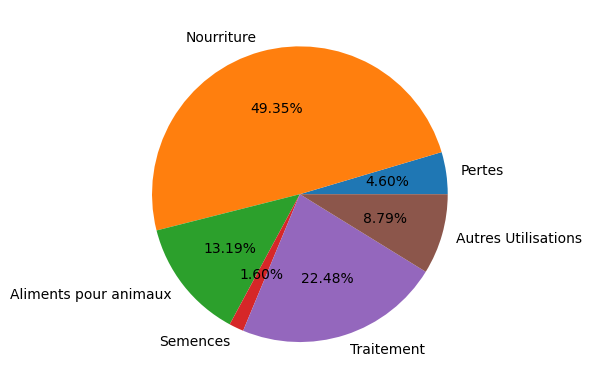

In [49]:
plt.pie(x=df_pie['Proportion'],labels=df_pie['Labels'], autopct='%.2f%%')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [50]:
#Création d'une liste avec toutes les variables
 
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle","Avoine", "Millet", "Sorgho", "Céréales", "Autres"]

#print (liste_cereales)

liste_génerale = dispo_alimentaire['Produit'].unique()
print (liste_génerale)



['Abats Comestible' 'Agrumes, Autres' 'Aliments pour enfants' 'Ananas'
 'Bananes' 'Beurre, Ghee' 'Bière' 'Blé' 'Boissons Alcooliques' 'Café'
 'Coco (Incl Coprah)' 'Crème' 'Céréales, Autres' 'Dattes'
 'Edulcorants Autres' 'Feve de Cacao' 'Fruits, Autres' 'Graines de coton'
 'Graines de tournesol' 'Graisses Animales Crue' 'Huil Plantes Oleif Autr'
 'Huile Graines de Coton' "Huile d'Arachide" "Huile d'Olive"
 'Huile de Colza&Moutarde' 'Huile de Palme' 'Huile de Soja'
 'Huile de Sésame' 'Huile de Tournesol' 'Lait - Excl Beurre'
 'Légumes, Autres' 'Légumineuses Autres' 'Maïs' 'Miel' 'Millet'
 'Miscellanees' 'Noix' 'Oeufs' 'Olives' 'Oranges, Mandarines' 'Orge'
 'Plantes Oleiferes, Autre' 'Poissons Eau Douce' 'Poivre' 'Pommes'
 'Pommes de Terre' 'Raisin' 'Riz (Eq Blanchi)' 'Sucre Eq Brut'
 'Sucre, betterave' 'Sucre, canne' 'Sésame' 'Thé' 'Tomates'
 "Viande d'Ovins/Caprins" 'Viande de Bovins' 'Viande de Volailles'
 'Viande, Autre' 'Vin' 'Épices, Autres' 'Alcool, non Comestible'
 'Animaux Aquat

In [51]:
#Création d'un dataframe avec les informations uniquement pour ces céréales  --> utilisrr une isinlist
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle","Avoine", "Millet", "Sorgho", "Céréales, Autres"]


df_cereales = dispo_alimentaire_2017[dispo_alimentaire_2017['Produit'].isin(liste_cereales)]
df_cereales.fillna(0)
df_cereales.head()



prop_totale = df_cereales['dispo_totale'].sum()
quantite_humaine_cereales = df_cereales['Nourriture'].sum()
quantite_animale_cereales = df_cereales['Aliments pour animaux'].sum()
prop_humaine_cereales = round((quantite_humaine_cereales/prop_totale)*100,2)
prop_animale_cereales = round((quantite_animale_cereales/prop_totale)*100,2)


print (f"La proportion animale est de {prop_animale_cereales}% et la proportion humaine est de {prop_humaine_cereales}%")


La proportion animale est de 36.57% et la proportion humaine est de 43.42%


In [52]:
dispo_alimentaire_2017.fillna(0, inplace=True)

([<matplotlib.patches.Wedge at 0x112c06660>,
 [Text(0.14752198197734145, 1.0900629637013988, 'Alimentation animale'),
  Text(-0.1475220166266382, -1.0900629590121895, 'Alimentation humaine')],
 [Text(0.08046653562400442, 0.5945797983825811, '45.72%'),
  Text(-0.08046655452362082, -0.5945797958248306, '54.28%')])

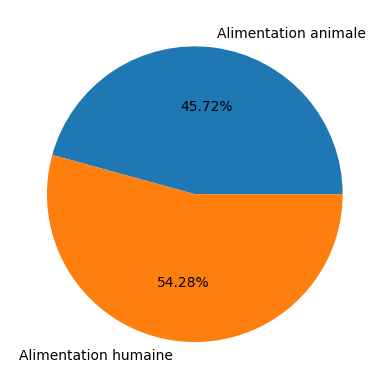

In [53]:
# affichage du pie chart 

# 1 on crée la data frame correspondante 

list_labels_2 = ['Alimentation animale','Alimentation humaine']
list_proportion_2 = ['36.57','43.42']

df_alim = pd.DataFrame({"Type_alimentation":list_labels_2,"Proportion":list_proportion_2})

df_pie.head()

# 2 on fait le diagramme circulaire 

plt.pie(x=df_alim['Proportion'],labels=df_alim['Type_alimentation'], autopct='%.2f%%')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [54]:
pop_sous_nut_2017.head(10)

,Zone,Année_x,sous_nutrition_1,Année_y,Population
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Allemagne,2016-2018,0.0,2017,82658409.0
5,Andorre,2016-2018,0.0,2017,77001.0
6,Angola,2016-2018,5800000.0,2017,29816766.0
7,Antigua-et-Barbuda,2016-2018,0.0,2017,95426.0
8,Arabie saoudite,2016-2018,1600000.0,2017,33101179.0
9,Argentine,2016-2018,1500000.0,2017,43937140.0


In [55]:
#Création de la colonne proportion par pays

# Regrouper les données par pays en sommant les valeurs pour chaque zone
#dispo_par_pays = dispo_alimentaire_2017.groupby('Zone').sum()

# Calculer la proportion de chaque pays par rapport à la somme mondiale
somme_mondiale = pop_sous_nut_2017['Population']
pop_sous_nut_2017['Proportion_par_pays'] = round(((pop_sous_nut_2017['sous_nutrition_1'] /pop_sous_nut_2017['Population'] )) * 100, 10)

pop_sous_nut_2017.fillna(0,inplace=True)
pop_sous_nut_2017.head(10)

,Zone,Année_x,sous_nutrition_1,Année_y,Population,Proportion_par_pays
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.437666
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.467203
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.140917
4,Allemagne,2016-2018,0.0,2017,82658409.0,0.000000
5,Andorre,2016-2018,0.0,2017,77001.0,0.000000
6,Angola,2016-2018,5800000.0,2017,29816766.0,19.452143
7,Antigua-et-Barbuda,2016-2018,0.0,2017,95426.0,0.000000
8,Arabie saoudite,2016-2018,1600000.0,2017,33101179.0,4.833665
9,Argentine,2016-2018,1500000.0,2017,43937140.0,3.413968


In [56]:
#affichage après trie des 10 pires pays
# Trier par Proportion_par_pays et afficher les 10 pires pays
top_10_pays = pop_sous_nut_2017[['Zone','Proportion_par_pays']].sort_values(by='Proportion_par_pays',ascending=False)

# Afficher les résultats
top_10_pays.head(10)


,Zone,Proportion_par_pays
78,Haïti,48.259182
157,République populaire démocratique de Corée,47.188685
108,Madagascar,41.062924
103,Libéria,38.279742
100,Lesotho,38.249438
183,Tchad,37.957606
161,Rwanda,35.055619
121,Mozambique,32.810898
186,Timor-Leste,32.173531
0,Afghanistan,28.928718


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [57]:
#calcul du total de l'aide alimentaire par pays
total_aide_alimentaire = aide_alimentaire['aide_alimentaire'].sum()

print(f"Total de l'aide alimentaire : {total_aide_alimentaire} depuis 2013" )

Total de l'aide alimentaire : 11035901000 depuis 2013


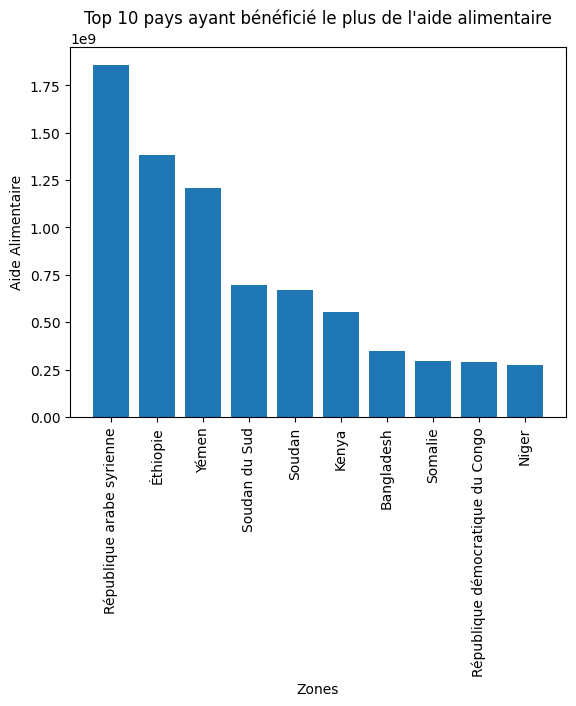

,Zone,aide_alimentaire
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


In [58]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

# Regrouper par Zone et somme de l'aide alimentaire
aide_alim = aide_alimentaire.groupby(['Zone']).sum()

# Trier et prendre les 10 premiers pays ayant le plus bénéficié de l'aide alimentaire
top_10_alim = aide_alim[['aide_alimentaire']].sort_values(by='aide_alimentaire', ascending=False).head(10)

# Réinitialiser l'index pour récupérer 'Zone' comme une colonne
top_10_alim = top_10_alim.reset_index()

# Afficher le graphique à barres
plt.bar(x=top_10_alim['Zone'], height=top_10_alim['aide_alimentaire'])
plt.xlabel('Zones')
plt.ylabel('Aide Alimentaire')
plt.title('Top 10 pays ayant bénéficié le plus de l\'aide alimentaire')
plt.xticks(rotation=90)  # Pour une meilleure lisibilité des noms des zones
plt.show()

top_10_alim.head(10)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [59]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
cinq_pays_aide = aide_alimentaire[['Zone', 'Année', 'aide_alimentaire']]

#puis groupby sur zone et année 
cinq_pays_aide = cinq_pays_aide.groupby(["Zone", "Année"]).sum().reset_index()


In [60]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

# Trier les données par aide alimentaire en ordre décroissant
top_5_alimentaire = cinq_pays_aide.sort_values(by='aide_alimentaire', ascending=False)

# Afficher les 10 premières lignes
top_5_alimentaire.head(10)

,Zone,Année,aide_alimentaire
158,République arabe syrienne,2014,651870000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000
157,République arabe syrienne,2013,563566000
159,République arabe syrienne,2015,524949000
217,Yémen,2016,465574000
193,Soudan du Sud,2014,450610000
216,Yémen,2015,372306000
189,Soudan,2013,330230000
190,Soudan,2014,321904000


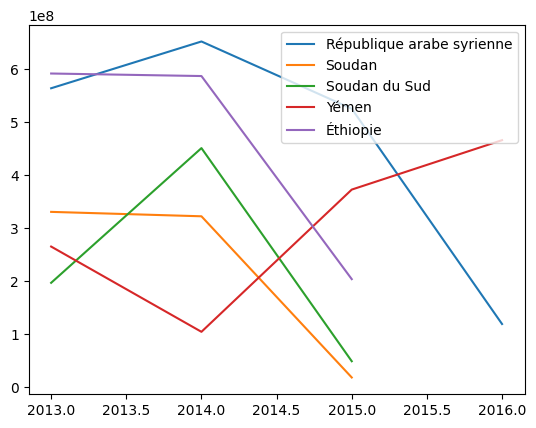

In [63]:
#On filtre sur le dataframe avec notre liste

# On rappelle la liste que'on a selectionné avant ça 
liste_pays = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

# On procede au filtrage avec la fonction .loc
cinq_pays_aide = cinq_pays_aide.loc[cinq_pays_aide['Zone'].isin(liste_pays),:]


# Affichage des pays avec l'aide alimentaire par année

cinq_pays_aide


#affichage evolution de ces cinq pays 
df1 = cinq_pays_aide.loc[cinq_pays_aide['Zone']=='République arabe syrienne',:]
df2 = cinq_pays_aide.loc[cinq_pays_aide['Zone']=='Soudan',:]
df3 = cinq_pays_aide.loc[cinq_pays_aide['Zone']=='Soudan du Sud',:]
df4 = cinq_pays_aide.loc[cinq_pays_aide['Zone']=='Yémen',:]
df5 = cinq_pays_aide.loc[cinq_pays_aide['Zone']=='Éthiopie',:]

plt.plot(df1['Année'],df1['aide_alimentaire'],label='République arabe syrienne')
plt.plot(df2['Année'],df2['aide_alimentaire'],label='Soudan')
plt.plot(df3['Année'],df3['aide_alimentaire'],label='Soudan du Sud')
plt.plot(df4['Année'],df4['aide_alimentaire'],label='Yémen')
plt.plot(df5['Année'],df5['aide_alimentaire'],label='Éthiopie')
plt.legend()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [64]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_kcal = dispo_alimentaire_2.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
dispo_alimentaire_kcal.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


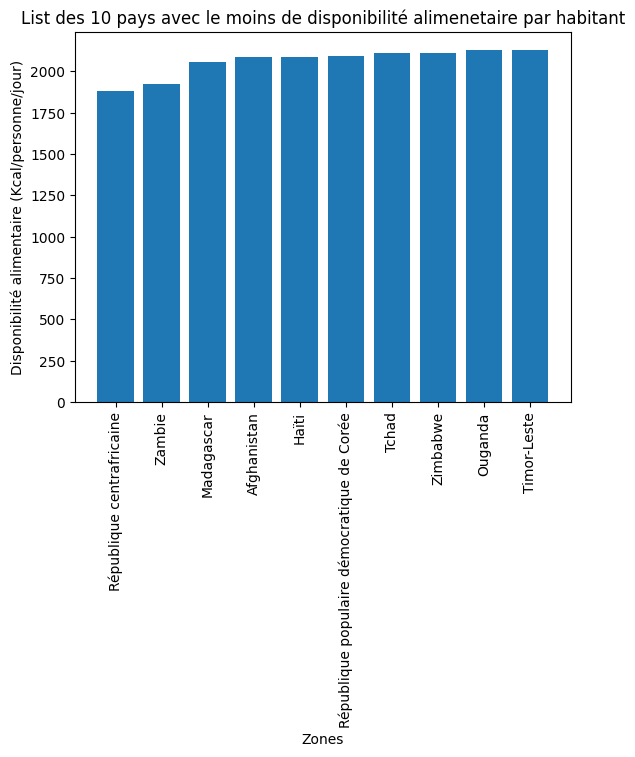

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


In [65]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
top_10_worst_dispo_alim = dispo_alimentaire_kcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)
# Afficher le graphique à barres
plt.bar(x=top_10_worst_dispo_alim['Zone'], height=top_10_worst_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xlabel('Zones')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('List des 10 pays avec le moins de disponibilité alimenetaire par habitant')
plt.xticks(rotation=90)  # Pour une meilleure lisibilité des noms des zones
plt.show()

top_10_worst_dispo_alim.head(10)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

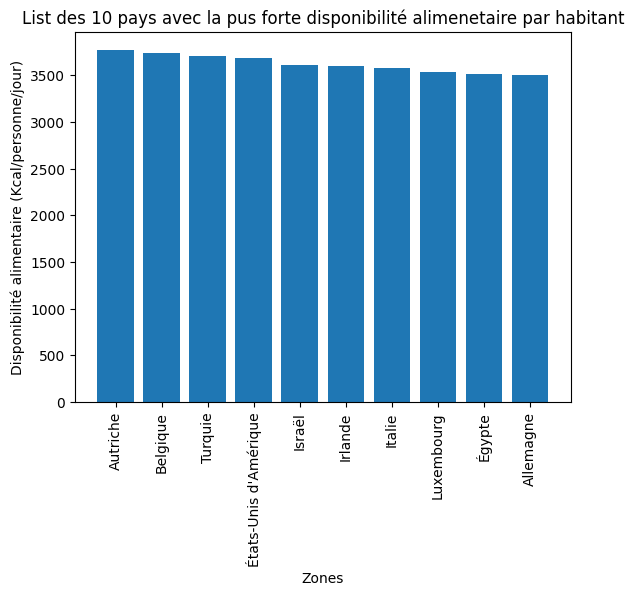

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


In [66]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
top_10_best_dispo_alim = dispo_alimentaire_kcal.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

# affichage sur graphique

# Afficher le graphique à barres
plt.bar(x=top_10_best_dispo_alim['Zone'], height=top_10_best_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.xlabel('Zones')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('List des 10 pays avec la pus forte disponibilité alimenetaire par habitant')
plt.xticks(rotation=90)  # Pour une meilleure lisibilité des noms des zones
plt.show()

top_10_best_dispo_alim.head(10)

In [67]:
pop_sous_nut_2017.head()

,Zone,Année_x,sous_nutrition_1,Année_y,Population,Proportion_par_pays
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.437666
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.467203
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.140917
4,Allemagne,2016-2018,0.0,2017,82658409.0,0.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [68]:
df_thailande = pop_sous_nut_2017.loc[
    (pop_sous_nut_2017['Zone'] == 'Thaïlande'),:]
df_thailande.head(50)

,Zone,Année_x,sous_nutrition_1,Année_y,Population,Proportion_par_pays
185,Thaïlande,2016-2018,6200000.0,2017,69209810.0,8.958268


In [69]:
#Calcul de la sous nutrition en Thaïlande
sous_nut_thailande = df_thailande['sous_nutrition_1'].sum()
popthai = df_thailande['Population'].sum()
prop_sous_nut_thai = round((sous_nut_thailande/popthai)*100,2)
print(f"La sous nutrition en Thailande est de {sous_nut_thailande} soit {prop_sous_nut_thai} % de la population thailandaise")

La sous nutrition en Thailande est de 6200000.0 soit 8.96 % de la population thailandaise


In [70]:
# Filtrer les données pour la Thaïlande en 2017
df_thailande_manioc = dispo_alimentaire_2.loc[( dispo_alimentaire_2['Zone'] == 'Thaïlande') & (dispo_alimentaire_2['Produit'] == 'Manioc'),:]

# Affichage des premières lignes
df_thailande_manioc.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [71]:
# On calcule la proportion exportée en fonction de la proportion

exporte = df_thailande_manioc['Exportations - Quantité'].iloc[0]
production = df_thailande_manioc['Production'].iloc[0]
proportion = (exporte / production) * 100
print(f"Proportion de manioc exportée : {proportion:.2f} %")


Proportion de manioc exportée : 83.41 %


On peut en déduire que la Thaïlande exporte une grande quantité de manioc, malgré un taux de sous-nutrition élevé dans le pays (9 %). Toutefois, cela ne signifie pas que cesser ces exportations suffirait à résoudre ce problème. En effet, il est possible que la Thaïlande utilise ces exportations pour financer l’importation d’autres denrées alimentaires essentielles.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

<div style="background-color: firebrick;">
  <h2 style="padding: 20px; color: #fff; text-align: center; margin: 0;">Mon analyse complémentaire : les 10 pays avec la plus forte disponibilité et ceux avec la moins forte afind de déterminer si l'écart est considérable
</div>

<p>A partir du DataFrame disponibilite_zone, nous allons afficher les 10 pays avec la plus forte disponibilité puis ceux avec la moins forte . Nous faisons le choix de faire le tri sur les apports caloriques.</p>

In [102]:
# Calculer la somme des disponibilités alimentaires par zone
disponibilite_zone = (
    dispo_alimentaire_2.groupby(['Zone'], as_index=False)  # 'as_index=False' pour que 'Zone' soit une colonne et non un index
    .sum(numeric_only=True)  # Somme uniquement des colonnes numériques
)

# Afficher les 10 zones avec la plus grande disponibilité alimentaire (Kcal/personne/jour)
disponibilite_zone[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']] \
    .nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


<p>On affiche maintenant les pays avec la dipsonibilitée la moins forte </p>

In [104]:
(disponibilite_zone.loc[disponibilite_zone['Disponibilité alimentaire (Kcal/personne/jour)'] != 0, ['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
).nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


<p>En ce qui concerne les apports calorifiques, on constate que certain pays ont une disponibilité largement supérieure aux apports moyens nécessaires (2 250 kcal/p/j). Néanmoins, le nombre de pays avec une disponibilités inférieure n'est pas si élevé que cela et la valeur minimale reste assez proche des apports nécessaires.</p>

<h2>Conclusion </h2>
<p>Nos calculs nous ont permis de constater, qu'en théorie, la disponibilité alimentaire permettrait de couvrir les besoins de l'ensemble de la population. Dans le détail, les produits d'origine végétale seraient suffisants, contrairement à ceux d'origine animale.
A l'échelle des pays, là aussi la disponibilité théorique est suffisante pour une grande majorité d'entre eux, même si certains disposent de plus que nécessaire quand d'autres atteignent seulement 80 % des besoins moyens.
Néanmoins, cela ne reflète pas la réalité qui montre que près de 13% de la population souffre de sous-nutrition.

Les chiffres soulèvent encore plus d'interrogations lorsque l'on étudie l'utilisation qui est faite de la disponibilité des produits.
Les exportations représentent parfois pratiquement la totalité de la production de pays pourtant en sous-nutrition, comme dans notre exemple avec la Thaïlande.
L'étude sur les céréales montrent que **38 % sont perdus** ou servent à nourrir les animaux alors que **72 % des aides** fournies aux pays en sous-nutrition le sont avec des céréales.

On pourrait en conclure que l'élevage et la consommation de viande, qui profite seulement à une petite part de la population mondiale, nécessite une quantité de produits végétaux et surtout de céréales qui serait suffisante pour nourrir la plupart de la population en sous-nutrition.</p>